<a href="https://colab.research.google.com/github/JFaberSFSD/Healthcare_Predictions/blob/main/Predicting_Heart_Disease_With_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/07 - Week 7 (August 1st)/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Let's check for any duplicates quick

In [7]:
df.duplicated().sum()

0

#Let's check for any missing values

In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#Initially, it does not appear we have any duplicates, or missing values, but we need to further explore our data to verify this. With only 11 variables and our target, we can easily go through our data one variable at a time to better understand it!

##To make this process simpler, let's create a function that we can call for creating visuals based on either NUMERIC or CATEGORICAL data

In [9]:
def Numeric_Describe(x):

  sns.set(style='darkgrid')
  fig, axes = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.20, .80)}, figsize=(10,8))

  sns.boxenplot(x, ax=axes[0],width = .8, color='c')
  sns.histplot(x, ax=axes[1])

  axes[0].set(yticks=[])
  sns.despine(ax=axes[1])
  sns.despine(ax=axes[0], left=True)


##This function was built with assistance from stack-overflow: https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python



def Categorical_Describe(x):

  sns.set(style='darkgrid')

  sns.countplot(x)

#Let's explore the AGE column

In [10]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

###Everything looks good so far. The MIN and MAX both make sense as true ages, so it doesn't look like we have any incorrect values to modify. Let's call our function now to better understand how our age are distributed across our data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


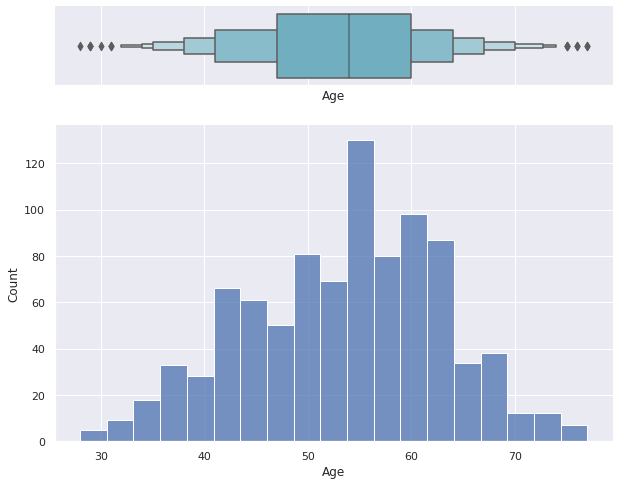

In [11]:
Numeric_Describe(df['Age'])

###Looks like our data leans pretty heavily on patients between the ages of 45-65. As this is a study on heart disease, this certainly makes sense. There are no missing or inappropriate datapoints in this column, so we're good to go on this one!

#Now let's explore the SEX column to see how gender is distributed across our data

In [12]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

###No missing or incorrect entires here. Let's call our function to better visuzlize our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


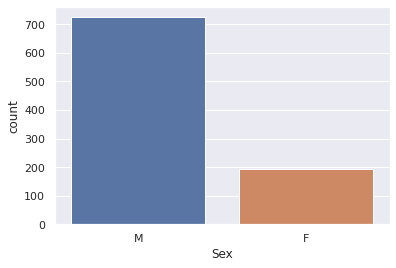

In [13]:
Categorical_Describe(df['Sex'])

###Nearly 80% of our data is males. This is interesting, but I'm not sure yet if it's really meaningful for our predictions. Again, with no missing or incorrect values, this column is good to go!

#The next column we're going to explore is Chest Pain Type

In [14]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

###We have no missing values, and the four values match up correctly with our data-dictionary: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

###Let's call our categorical function to once again better visualize our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


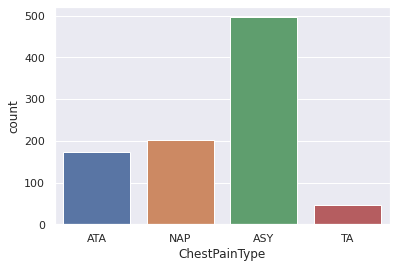

In [15]:
Categorical_Describe(df['ChestPainType'])

###Based on this, it appears that over half of our patients did not experience chest pain, and were listed as 'ASYMPTOMATIC'.

###With no missing values and all of the data looking correct, this column is also good to go! 

#Next let's look at RestingBP

In [16]:
df['RestingBP'].describe()

#A resting BP of "0" isn't possible. It appears "0" in this case is just substituting for a missing value. 
#Let's convert all "0" back to null values, and recheck for missing values to see just how many we have

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [17]:
df['RestingBP'] = df['RestingBP'].replace(0,np.nan)

df['RestingBP'].isna().sum()

#It appears we only have one single missing value in this column. With only 1 missing, coming up with an imputation strategy seems silly, so let's just drop that one row

1

In [18]:
df = df.dropna(subset=['RestingBP'])

df['RestingBP'].isna().sum()

0

###Now that it's been cleaned up, let's visualize our data with our function

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


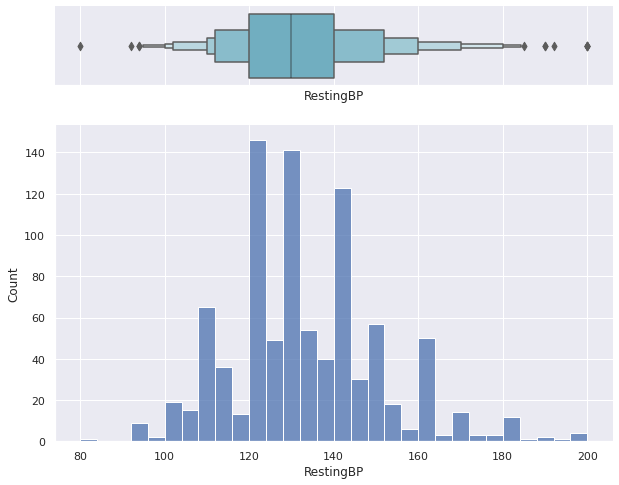

In [19]:
Numeric_Describe(df['RestingBP'])

###Looks like out data is very centralized between 120-140. This makes sense as this is a pretty normal BP range. We do have some patients that are slight outliers, with either very low, or very high BP. It will be interesting to see later if either of these have a strong correlation to our target variable!

#Now let's check out Cholesterol

In [20]:
df['Cholesterol'].describe()

#We once again have a min value of "0", however a "0" cholesterol is actually possible, so we're going to leave this one as is

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

###There are no missing or inappropriate values in Cholesterol, so this column appears to be ready to go! Let's call our function again to visualize our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


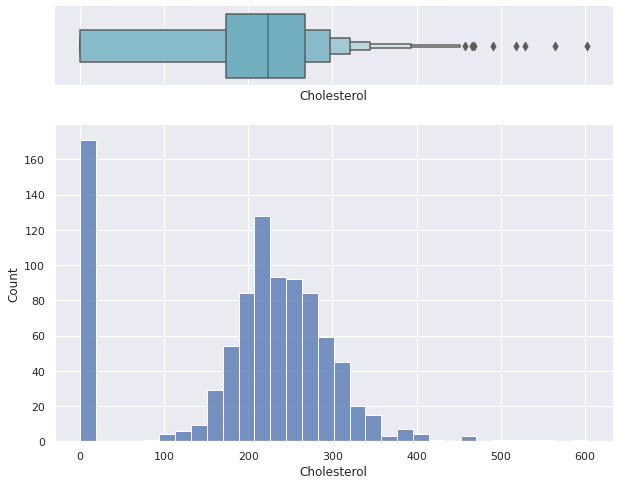

In [21]:
Numeric_Describe(df['Cholesterol'])

###The total number of ZEROS here is slightly alarming, and did make me think once again that "0" is being used in place of a null value. However, I checked the source data and data description, and their histogram of cholesterol looks just like ours, suggesting our data is correct, so we will not impute or change any of these values and move forward with them truly as zero.

#Next we'll explore FastingBS

In [22]:
df['FastingBS'].value_counts()

0    703
1    214
Name: FastingBS, dtype: int64

###Everything looks good so far. According to our data dictionary, a value of '1' here represents a fasting blood sugar of > 120 mg/dl, otherwise it's marked as '0'. No missing or otherwise inappropriate value, data appears to be good to go. Let's call our visualization function.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


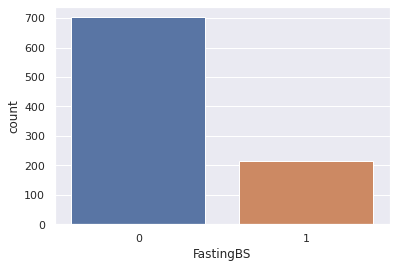

In [23]:
Categorical_Describe(df['FastingBS'])

###It looks like just over 3/4th of our patients do NOT have a fasting blood-sugar of >120mg/dl. 

#Next up is RestingECG

In [24]:
df['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

###According to our data dictionary, we should have three values in this column and we have exactly that. No missing or inappropriate values, so everything looks good here. Let's once again visualize our data to better understand it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


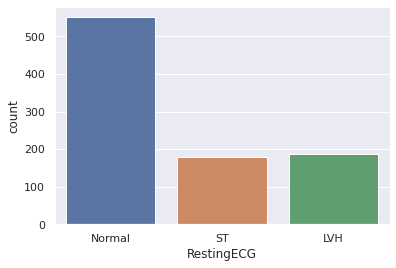

In [25]:
Categorical_Describe(df['RestingECG'])

###Looks like about 60% of our patients have a normal resting ECG, while about 20% each respectively either have ST or LVH

#Now let's look at MaxHR

In [26]:
df['MaxHR'].describe()

count    917.000000
mean     136.789531
std       25.467129
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

###Everything looks good here. We do have some quite high and quite low numbers, but everything seems to exist within the realm of possible. No missing or inappropriate values to clean-up, so let's visualize our data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


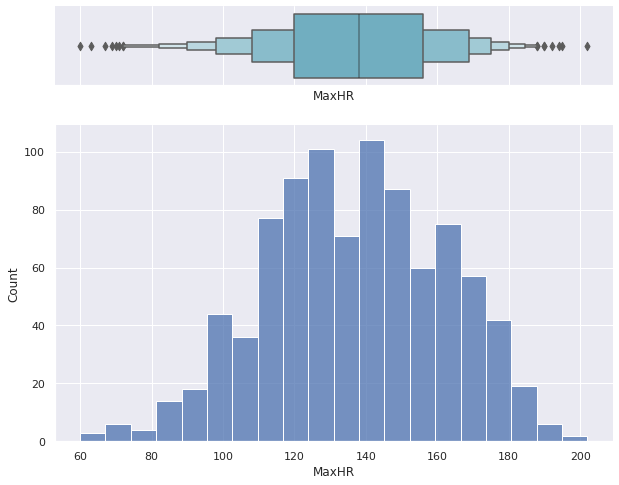

In [27]:
Numeric_Describe(df['MaxHR'])

###We have a solid overall spread of MaxHR accross our dataset. The bulk of our data exists between 120-160, but there are enough patients that exist outside of these quartiles to make this an interesting variable to explore later!

#Now we're on to ExerciseAngina

In [28]:
df['ExerciseAngina'].value_counts()

#This is a simple Yes/No categorical column. Let's switch it over to "0" for No and "1" for Yes as this will help us later!

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [29]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0,'Y':1})
df['ExerciseAngina'].value_counts()

0    546
1    371
Name: ExerciseAngina, dtype: int64

###That's better! There are no missing or inappropriate values to speak of, so let's call our function

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


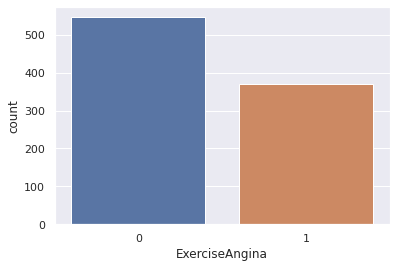

In [30]:
Categorical_Describe(df['ExerciseAngina'])

###Pretty even split across our dataframe on this one! We're looking at about 40% of our patients who did have Exercise Angina, and about 60% who did not.

#Now let's check on Oldpeak

In [31]:
df['Oldpeak'].describe()

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

###No missing or inappropriate values here, so let's once again call our function to visualize the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


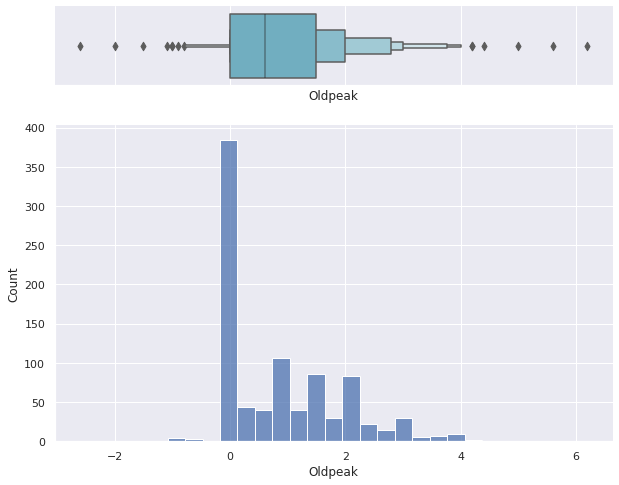

In [32]:
Numeric_Describe(df['Oldpeak'])

###There are a fair amount of zeros in our dataframe, however this column is a measure of ST eleveation/depression, so a 0 would simply mean they didn't have any abnormality, which is still a valid datapoint and should remain in our dataset. With this in mind, there is no additional modifications that need to be made and this column is good to go!

#Let's check out our last non-target variable: ST_Slope

In [33]:
df['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

###According to our data dictionary, these are indeed the three values we should have in this column, and there are no missing or incorrect values here. Let's call our categorical function to visualize what we have

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


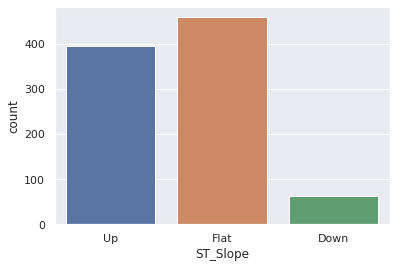

In [34]:
Categorical_Describe(df['ST_Slope'])

###It loos like around half of our patients had a flat ST Slope, while around 45% had an upward ST Slope, and just over 5% had a downward slope. 

#Lastly, let's check our target variable: HeartDisease!

In [35]:
df['HeartDisease'].value_counts()

1    507
0    410
Name: HeartDisease, dtype: int64

###We have a fairly balanced dataset for our target variable! According to our data dictionary, '1' here represents that the patient DID have heart disease. Let's call our categorical function for one final exploratory visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


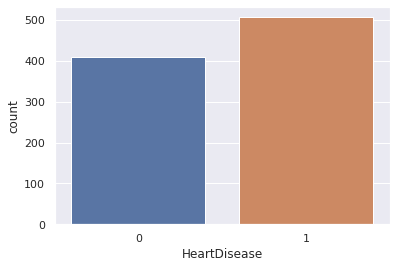

In [36]:
Categorical_Describe(df['HeartDisease'])

###We can see from this visual, that about 55% of our patients are in the POSITIVE class for having heart disease, while around 45% of our patients are in the NEGATIVE class for NOT having heart disease.

#That's a good first step for cleaning and preparing our data! Before we dig too deeply into our data, let's run a quick correlation heat map of our numeric columns to see if we can find a good place to start!

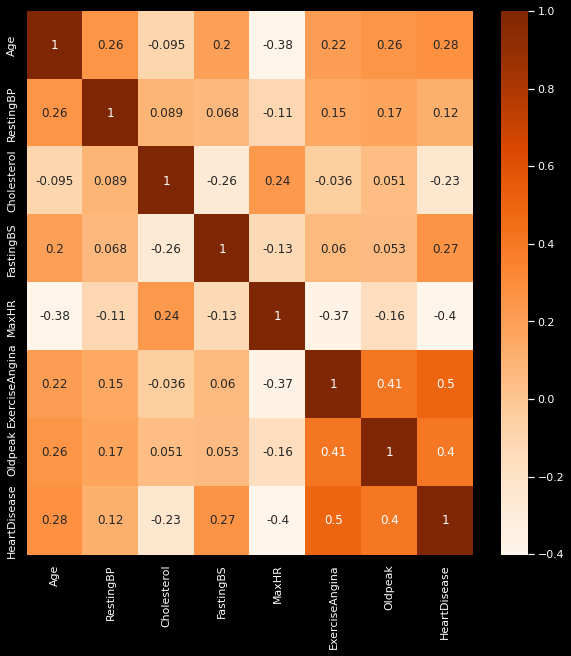

In [37]:
corr = df.corr()
plt.style.use('dark_background')
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'Oranges',annot=True)

###Couple of things that stick out to me right away are that we have some positive correlation between ExerciseAngina and our Target (HeartDisease). It's look like there is a minor positive correlation between Age, as well as FastingBS and our Target. Lastly we can see a reasonable negative correlation between MaxHR and our Target. Let's dig a little deeper into these variables to see what we can find!

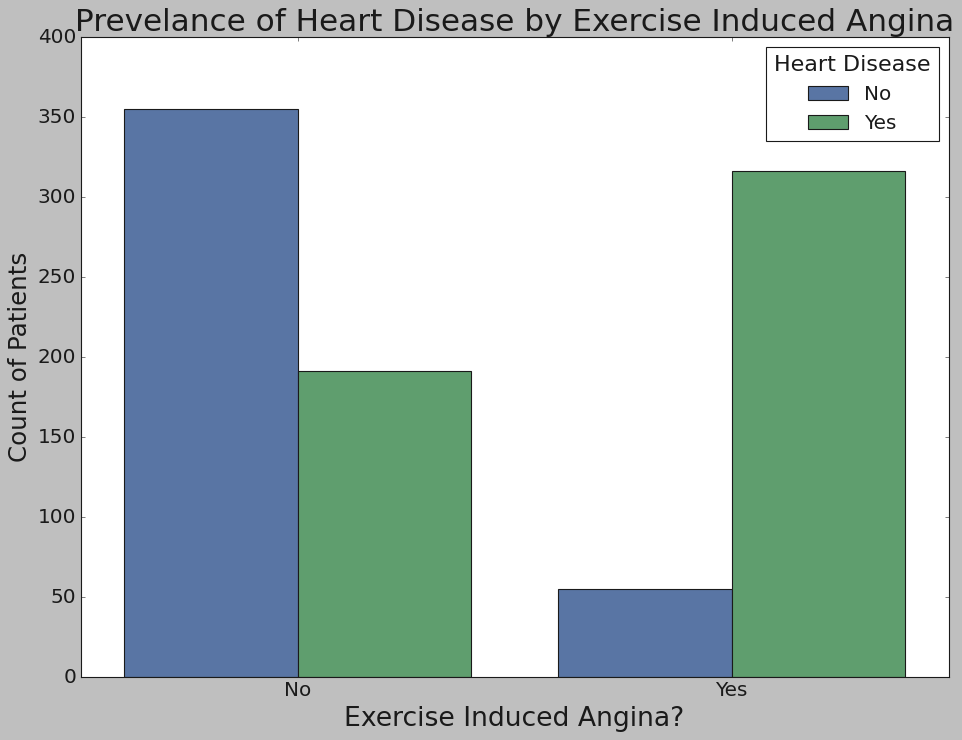

In [42]:
#Let's get rid of our "0" and "1" and replace with "Yes"/"No" for easier readability!

Visual_df = df.copy()

Visual_df['ExerciseAngina'] = Visual_df['ExerciseAngina'].replace({0:"No",1:"Yes"})
Visual_df['HeartDisease'] = Visual_df['HeartDisease'].replace({0:"No",1:"Yes"})

plt.figure(figsize = (14,10))
plt.style.use('classic')
sns.countplot(data = Visual_df, x='ExerciseAngina', hue='HeartDisease')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Prevelance of Heart Disease by Exercise Induced Angina',fontsize=28,c='k')
plt.xlabel('Exercise Induced Angina?',fontsize=24)
plt.ylabel('Count of Patients',fontsize=22)
plt.legend(title='Heart Disease', title_fontsize=20, fontsize=18)



plt.show()

#It may be a simple visualization, but it shows a pretty profound relationship between our variables! While we can see that we certainly have a fair amount of heart disease patients that did NOT have an exercise induced angina, for those patients that DID have an exercise induced angina, the liklihood of them having heart disease is SIGNIFICANT! 

Text(0, 0.5, 'Max Heart Rate')

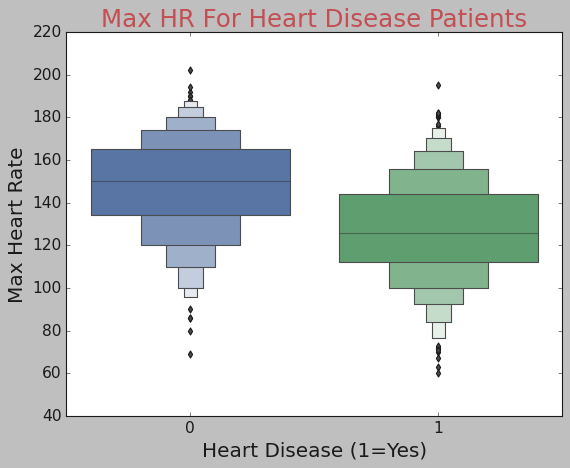

In [39]:
sns.boxenplot(data = df, x ='HeartDisease',y ='MaxHR')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Max HR For Heart Disease Patients',fontsize=22,c='r')
plt.xlabel('Heart Disease (1=Yes)',fontsize=18)
plt.ylabel('Max Heart Rate',fontsize=18)

###On the surface, this gives us a nice visualization of the correlation between Max Heart Rate and Heart Disease. There is a very clear negative correlation here, where patients that are positive for Heart Disease have a LOWER MaxHR score! The tough part is that this chart might not be best for non-technical audiences as it's tough to read without an understanding of how box plots work. Since this is still a very important variable (and second highest correlation to our target!) - let's get creative to see if we can find a better way to visualize this information!

In [46]:
#Let's create MaxHR ranges for our data, to group it together and make it more 'categorical'

def MaxHRRange(x):
  if x <80:
    return "<80"
  elif 80 <= x <=100:
    return "80-100"
  elif 100 < x <= 120:
    return "101-120"
  elif 120 < x <= 140:
    return "121-140"
  elif 140 < x <= 160:
    return "141-160" 
  elif 160 < x <= 180:
    return "161-180"   
  else:
    return ">180"


#Once again let's modify our Visual_df, leaving our original df as-is for future modeling

Visual_df['MaxHR'] = Visual_df['MaxHR'].apply(MaxHRRange) 

Visual_df['MaxHR'].value_counts()

121-140    251
141-160    229
101-120    176
161-180    149
80-100      74
>180        27
<80         11
Name: MaxHR, dtype: int64

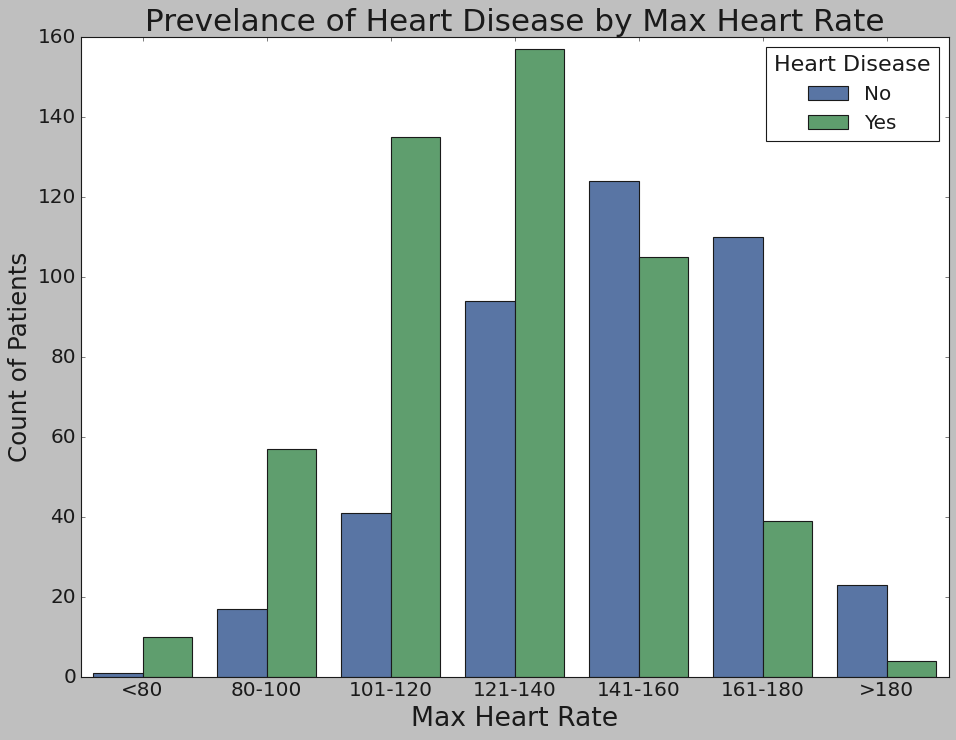

In [50]:
MaxHR_Order = ['<80','80-100','101-120','121-140','141-160','161-180','>180']

plt.figure(figsize = (14,10))
plt.style.use('classic')
sns.countplot(data = Visual_df, x='MaxHR', hue='HeartDisease', order = MaxHR_Order)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Prevelance of Heart Disease by Max Heart Rate',fontsize=28,c='k')
plt.xlabel('Max Heart Rate',fontsize=24)
plt.ylabel('Count of Patients',fontsize=22)
plt.legend(title='Heart Disease', title_fontsize=20, fontsize=18)



plt.show()

#Excellent! This tells the same story, but is a little easier to follow for non-technical audiences. We can see from this bar chart, that when we look at lower max heart rates (<80, 80-100, 101-120) we see that the number of patients that are in the POSITVE class for heart disease, far outnumber the patients that do NOT have heart disease. As we continue to work our way higher, at about 141-160 the numbers level off to about an even split, and them as we move higher into the 161,180, or >180 class, the amount of patients that are positive for heart disease drops significantly!